# AutoEncoder_EMStack_Test#
### In this example I just want to illustrate the use of "transposedConvLayer" to make an Autoencoder. In this example, a fairly simple architecture with  attempts to represent a quite rich EMStack image.
#### Network ####
Input(28,28,1) - Conv(3,3)  - Maxp (2,2) - Conv(3,3) - Maxp(2,2) - Out (12,12,5) - 2xTransposedConv(2,2) - Output (28,28,1)
#### Note ####
Rarely converges to a nice solution

In [1]:
from platform import python_version
print(python_version()) # tested with 3.7.1
# this adds the python wrapper module directory to the path.
import os
import sys
import importlib
bindingspath = os.getcwd() + '/../build/python'
sys.path.append(bindingspath)
print(sys.path)

3.7.3
['/home/adria/Documents/Documents/TUM/dlfs/libdl/python', '/home/adria/anaconda3/lib/python37.zip', '/home/adria/anaconda3/lib/python3.7', '/home/adria/anaconda3/lib/python3.7/lib-dynload', '', '/home/adria/anaconda3/lib/python3.7/site-packages', '/home/adria/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/adria/.ipython', '/home/adria/Documents/Documents/TUM/dlfs/libdl/python/../build/python']


In [2]:
# The library wrapper
import pybindings as pyb
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

In [3]:
# Load Mnist
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from skimage import io
imTrain = io.imread(os.getcwd() + '/data/train-volume.tif')
NumImages = 30;
ImageDim = 512 * 512
imsTrain = np.reshape(imTrain, (NumImages, ImageDim)).transpose() 

In [4]:
# dataset properties
print("Values per Image:", imsTrain.shape[0])
print("Number of images for training:", imsTrain.shape[1])
from matplotlib import pyplot as plt
%matplotlib inline 

Values per Image: 262144
Number of images for training: 30


In [5]:
#subsample if necessary
trXSub = (imsTrain[:,0:1]).astype(np.double)/255
trXSub

array([[0.49411765],
       [0.41960784],
       [0.47843137],
       ...,
       [0.71764706],
       [0.64313725],
       [0.67058824]])

In [6]:
# importlib.reload(pyb) # For some reason, this appears not to be working

In [7]:
deepAE = pyb.AutoEncoderExample6(512,512,1)


Conv In Depth: 1 In Height: 512 In Width: 512 Out Depth: 16 Out Height: 512 Out Width: 512
Maxp In Depth: 16 In Height: 512 In Width: 512 Out Depth: 16 Out Height: 256 Out Width: 256
Conv In Depth: 16 In Height: 256 In Width: 256 Out Depth: 4 Out Height: 256 Out Width: 256
Maxp In Depth: 4 In Height: 256 In Width: 256 Out Depth: 4 Out Height: 128 Out Width: 128
Tran In Depth: 4 In Height: 128 In Width: 128 Out Depth: 16 Out Height: 256 Out Width: 256
Tran In Depth: 16 In Height: 256 In Width: 256 Out Depth: 1 Out Height: 512 Out Width: 512


In [8]:
# train and test (prints some result and returns test results)
deepAE.Train(trXSub,trXSub,0.000005,20)

Loss of a given sample at epoch: 0
0.0164827
Loss of a given sample at epoch: 1
0.0144306
Loss of a given sample at epoch: 2
0.0141506
Loss of a given sample at epoch: 3
0.0140646
Loss of a given sample at epoch: 4
0.0140877
Loss of a given sample at epoch: 5
0.0141147
Loss of a given sample at epoch: 6
0.0140953
Loss of a given sample at epoch: 7
0.0140499
Loss of a given sample at epoch: 8
0.0140145
Loss of a given sample at epoch: 9
0.0140018
Loss of a given sample at epoch: 10
0.0139945
Loss of a given sample at epoch: 11
0.0139915
Loss of a given sample at epoch: 12
0.0139892
Loss of a given sample at epoch: 13
0.0139867
Loss of a given sample at epoch: 14
0.0139841
Loss of a given sample at epoch: 15
0.0139822
Loss of a given sample at epoch: 16
0.0139812
Loss of a given sample at epoch: 17
0.0139809
Loss of a given sample at epoch: 18
0.013981
Loss of a given sample at epoch: 19
0.0139812


testing:


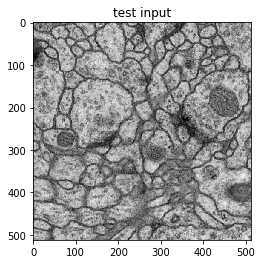

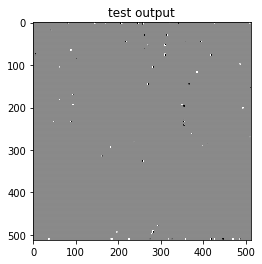

In [9]:
sampleNum = 0
deepAEOut = deepAE.Test(imsTrain[:,sampleNum])
plt.title("test input")
plt.imshow(np.reshape(trXSub[:,sampleNum],(512,512)), interpolation='nearest', cmap='gray')
plt.show()
plt.title("test output")
plt.imshow(np.reshape(deepAEOut,(512,512)), interpolation='nearest', cmap='gray')
plt.show()

In [10]:
deepAEOut

array([[0.53874432],
       [0.53557446],
       [0.53874432],
       ...,
       [0.53980659],
       [0.53968786],
       [0.53980659]])